In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap # useful for ploting maps
import seaborn as sns
sns.set(style="darkgrid")
import datetime

In [17]:
data = pd.read_csv('C:/Users/Harsh Patel/Desktop/Mini Project/dataset/train_data.csv')


In [18]:
data.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Unnamed: 20,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,NaN


In [19]:
data.shape

(23412, 22)

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [21]:
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Unnamed: 20                       0
Status                        23412
dtype: int64

In [22]:
# Location Source

# Display most common sources

data['Location Source'].value_counts()[:5]

US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
Name: Location Source, dtype: int64

Text(0.5, 1.0, 'Location Source and Frequency')

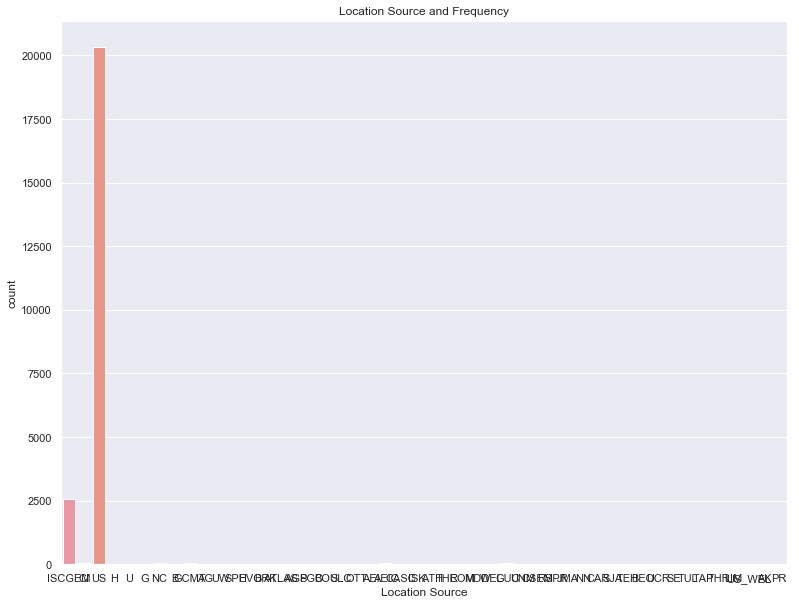

In [23]:
# plot Magnitude Source Frequency
plt.figure(figsize=(13, 10))

sns.countplot(x="Location Source", data=data)
# plt.ylabel('Frequency')
plt.title('Location Source and Frequency')

In [24]:
# Magnitude Source

# Display most common magnitude sources

data['Magnitude Source'].value_counts()[:5]

US        10458
HRV        8223
ISCGEM     2580
GCMT       1489
NC          533
Name: Magnitude Source, dtype: int64

Text(0.5, 1.0, 'Magnitude Source and Frequency')

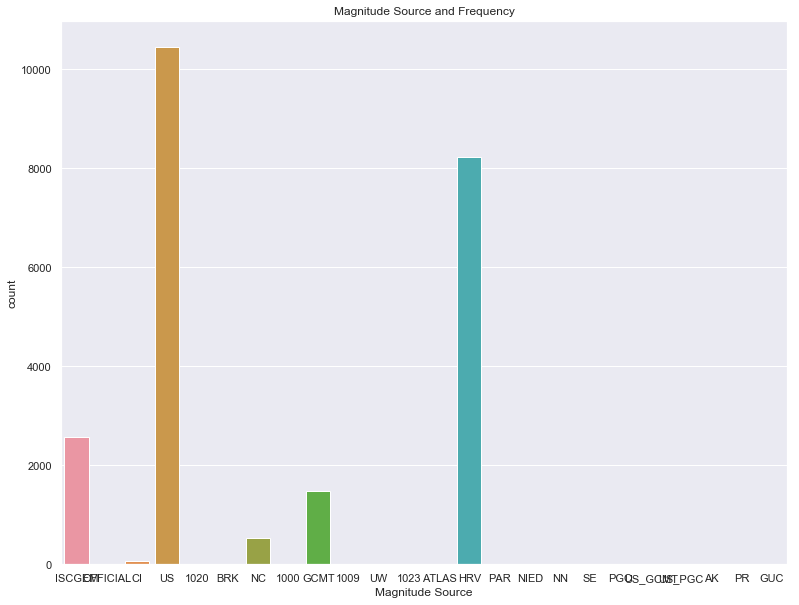

In [25]:
plt.figure(figsize=(13, 10))

sns.countplot(x="Magnitude Source", data=data)

plt.title('Magnitude Source and Frequency')

In [26]:
# Minumum magnitude

data['Magnitude'].min()

5.5

In [27]:
# Maximum magnitude

data['Magnitude'].max()

9.1

In [28]:
g8 = data[data['Magnitude'] > 8.5]
g8['Location Source'].value_counts()

US        5
ISCGEM    1
Name: Location Source, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

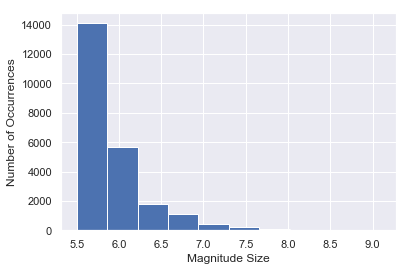

In [29]:
plt.hist(data['Magnitude'])

plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')

Text(0.5, 1.0, 'Magnitude Type VS Frequency')

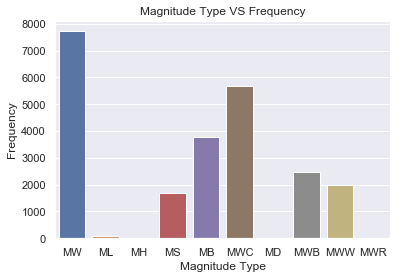

In [30]:
# Plot Distribution plot of 'Magnitude Type' values

# plt.hist(data['Magnitude Type'])

# plt.figure(figsize=(13, 10))

sns.countplot(x="Magnitude Type", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Type VS Frequency')

<Figure size 936x720 with 0 Axes>

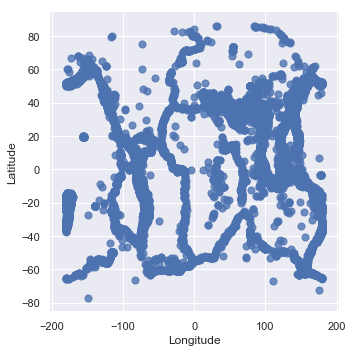

In [31]:
# Latitude vs Longitude

# Simple distribution  maping

plt.figure(figsize=(13, 10))

sns.lmplot('Longitude', 'Latitude',
           data=data,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 50})

In [34]:

data['date'] = data['Date'].apply(lambda x: pd.to_datetime(x))



In [35]:
# Earthquakes by Year

# Process the year from 'Date' column

data['year'] = data['date'].apply(lambda x: str(x).split('-')[0])





Text(0.5, 1.0, 'Number of Earthquakes In Each Year')

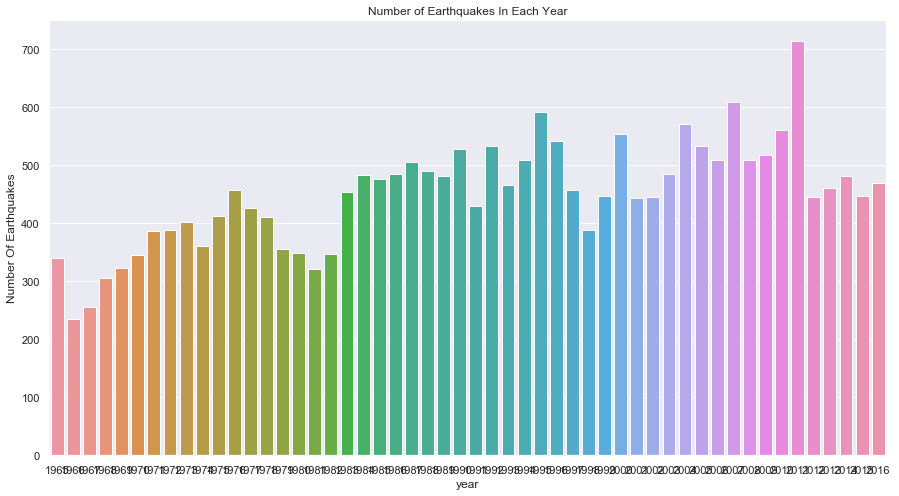

In [36]:
# Earthquakes by Year

plt.figure(figsize=(15, 8))
sns.set(font_scale=1.0)
sns.countplot(x="year", data=data)
plt.ylabel('Number Of Earthquakes')
plt.title('Number of Earthquakes In Each Year')

In [37]:
data['year'].value_counts()[:1]

2011    713
Name: year, dtype: int64

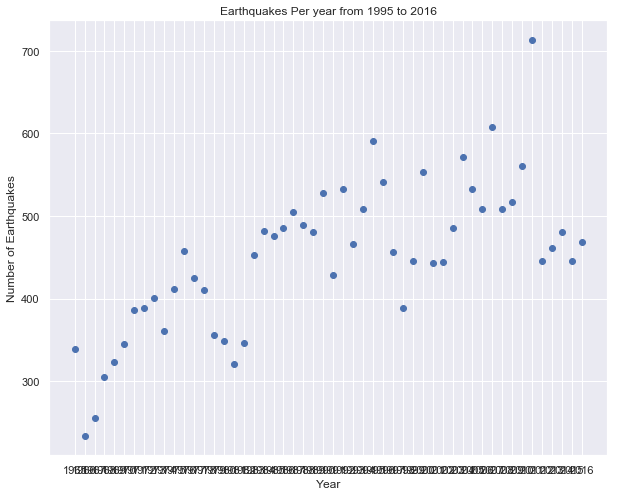

In [38]:
# Correct match (year, number of earthquakes)

x = data['year'].unique()
y = data['year'].value_counts()

count = []
for i in range(len(x)):
    key = x[i]
    count.append(y[key])

# Earthquakes Variations over the years

plt.figure(figsize=(10, 8))

plt.scatter(x, count)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes Per year from 1995 to 2016')
plt.show()

In [39]:
data.loc[data['Magnitude'] > 8, 'Class'] = 'Great'
data.loc[ (data['Magnitude'] >= 7) & (data['Magnitude'] < 7.9), 'Class'] = 'Major'
data.loc[ (data['Magnitude'] >= 6) & (data['Magnitude'] < 6.9), 'Class'] = 'Strong'
data.loc[ (data['Magnitude'] >= 5.5) & (data['Magnitude'] < 5.9), 'Class'] = 'Moderate'

Text(0.5, 1.0, 'Magnitude Class VS Frequency')

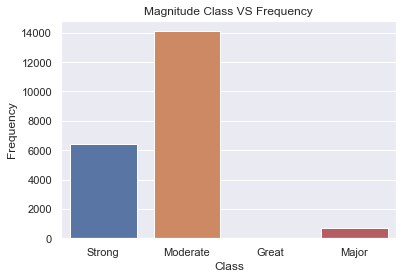

In [40]:
# Magnitude Class distribution

sns.countplot(x="Class", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Class VS Frequency')

In [7]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes (This is just my assumption, it does not reflect
    # the real metric for small, moderate and significant earthquake)
    if magnitude < 6.2:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')
    
# read longitude, latitude and magnitude
data = pd.read_csv('C:/Users/Harsh Patel/Desktop/Mini Project/dataset/train_data.csv')
data.head()
lons = data['Longitude'].values
lats = data['Latitude'].values
magnitudes = data['Magnitude'].values
timestrings = data['Date'].tolist()
    
min_marker_size = 0.5

for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag # * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize) 
                
title_string = "Earthquakes of Magnitude 5.5 or Greater\n"
title_string += "%s - %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string)
plt.show()

SyntaxError: invalid syntax (<ipython-input-7-23606f7fcf30>, line 13)